# UX 2 Collecting Data

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning Goals
After working your way through this notebook you should be able to:

- Explain what a variable is
- Give examples of different kinds of data 
- Set up a contingency table 
  

## Table of Contents

- [1. Variables](#Variables)
    - [1.1 Manipulating Variables](#Manipulating)
- [2. Kinds of Data](#Datatypes)
    - [2.1 Categorical Data](#Categorical)
    - [2.2 Quantitative Data](#Quantitative)
    - [2.3 Completion rate](#CompletionRate)
    - [2.4 Continuous Data](#Continous)
- [3. Contingency Tables](#Contingency)    
- [4. Sensitivity of Quantitative Data](#Sensitivity)


<a id= 'Variables'> </a>


## 1 Variables 

A variable is something that can take at least two values. It can be pretty much anything: the number of users clicking the 'help' button during a day; how fast a player can get through a puzzle game; or how users rate a product that is being tested. 

We tend to be interested in how variables vary because this can help us answer our research questions. Which, in turn, could be: "Does it have an effect where we place the help button?"; " Can sound effects help players solve a puzzle game more efficiently?"; " Do users prefer our product to another?"



In [1]:
#Loading libraries we will use in this notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id= 'Manipulating'> </a>


### 1.1 Manipulating Variables

The previous examples of research questions all concern whether two variables are *related* in some way. That is, does A have an effect on B? 
To answer our question, we collect data on variables A and B and see if there is a relationship between them. For example, we can do this by observations, or by checking the correlation between variables. But to be completely sure that A indeed has an effect on B, we need to set up experiments where we *manipulate* A and measure B. If B changes when nothing but A is altered, we can (with some confidence) say that A has an effect on B. This is the essence of an experiment: manipulating only one variable, keeping everything else constant, and then measuring the effect. 

The *INDEPENDENT* variable (A) is the one that is controlled and manipulated
by the experimenter in order to create different conditions for the
experiment. The aim is to see if these manipulations have an
effect on the *DEPENDENT* variable (B), which is the one being measured.


Text(0, 0.5, 'B (Dependent Variable)')

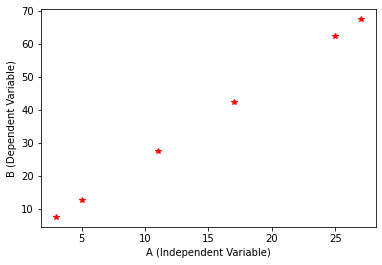

In [2]:
#Let's assume we have a variable A
# we can generate an array (using numpy library)
A=np.array([3,5,11,17,25,27])

#And if B is a dependent variable there may be a relationship between the two
B=2.5*A

#We plot using matplotlib
plt.plot(A,B, 'r*') #the 'r*' specify color and shape of the markers
#in this scatter plot we will use red stars

plt.xlabel('A (Independent Variable)')
plt.ylabel('B (Dependent Variable)')

### Try out 1: 
Now specify another variable

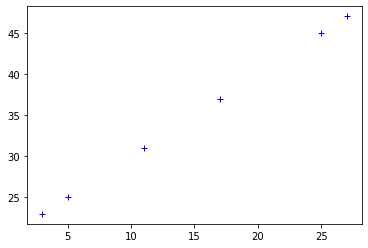

In [3]:
#TRY OUT: 
#specify a variable C= A+ 20 and plot this vs. A

C= A + 20
plt.plot(A,C, 'b+') #the 'b+' means blue plusses 

ANSWER: What kind of relationship is there betwewn variable A and C?

In [4]:
# We can combine our variables into a 2D array
array=np.array([A,B,C])
array

array([[ 3. ,  5. , 11. , 17. , 25. , 27. ],
       [ 7.5, 12.5, 27.5, 42.5, 62.5, 67.5],
       [23. , 25. , 31. , 37. , 45. , 47. ]])

Note that because B was defined as 2.5 times A (resulting in non integer numbers) the whole 2D array is floats as a result. 

But, just like previous notebook, we would like to have the variables in a DATA FRAME where we define the three variables A, B, C.

In [5]:
#convert array into DATA FRAME
df = pd.DataFrame(array.T, columns=(["A","B","C"]), index=[1,2,3,4,5,6])
df

,A,B,C
1,3.0,7.5,23.0
2,5.0,12.5,25.0
3,11.0,27.5,31.0
4,17.0,42.5,37.0
5,25.0,62.5,45.0
6,27.0,67.5,47.0


In [6]:
#Data frame allows some quick diagnostics
df.describe()

,A,B,C
count,6.000000,6.000000,6.000000
mean,14.666667,36.666667,34.666667
std,10.073066,25.182666,10.073066
min,3.000000,7.500000,23.000000
25%,6.500000,16.250000,26.500000
50%,14.000000,35.000000,34.000000
75%,23.000000,57.500000,43.000000
max,27.000000,67.500000,47.000000


<a id= 'Scales'> </a>

## 2. Kinds of Data

We can measure different kinds of data: *quantitative* or *categorical*. Different kinds of
measurement types call for different analysis methods. That
is, depending on the question, one might be more suitable to use than the
other.

*Categorical:*   Examples might be categorization of gender, race, religion, or type of sport of choice. In terms of UX testing it could be type of usability problem, or a participant choosing the preferred version among two or more implementations. When the categories can be ordered the data is referred to as *ordinal* (as in sizes small, medium, large, etc.). However, the difference between 'small' and 'medium' is not necessarily the same as the difference between 'medium' and 'large'.

*Quantitative:*  Quantitative can be discrete (pass/fail) or continuous (completion time, cm). The continous data can take any value and infinite number of steps (time can be measured in fractions of seconds for instance).

<a id= 'Categorical'> </a>

### 2.1 Categorical Data

One example of categorical data is whether a user successfully can complete a task using the system, or not. 
Another that we will use for our purposes now is the random act of flipping a coin: The outcome is either head or tail. We can simulate flipping a coin using a numpy function.

(array([56.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 44.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

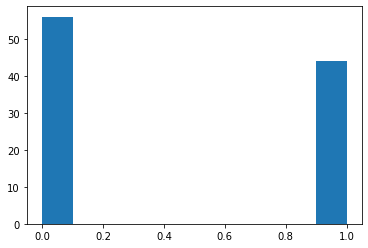

In [7]:

# We can see the two outcomes by simulating N=100 coin flips 
score=np.random.randint(2, size=100) #generate randomo vector with 100 scores

#and plot the distribution of this in a histogram
plt.hist(score)


Here 0 stands for one category and 1 for the other. In the plot we can see how many of the tossess that result in  0 and 1. Note that these are categories, there is no point in trying to calculate an average of the two outcomes. Just as we would not calculate means of how many that chose product A or product B.


<a id= 'Quantitative'> </a>

### 2.2 Quantitative Data

If we instead count the number of heads in each 100 tosses and obtain the total number of heads we have quantitative data.
 
Similarly we can study the number of  "successful"  task completions, counting how many users that completed, and obtain the completion rate.

In [8]:
# If we count the number of heads in each 100 tosses and obtain the total number of heads
# we use another type of measurement. 

sum(score) #this is still discrete


44

This number is quantitative with a meaningful zero (0 heads in 100 tosses). It can only take discrete values but if we re-do the 100 tosses we can record the measure to compare the outcome and calculate measures in a meaningful way. 

Note that the sum of heads will vary slightly, even if we expect that both categories occur approximately equal amount of times. It is a random outcome after all. But if we draw a lot of samples, each time making 100 tosses, we should see the number of heads centered around the expected 50-50

Text(0.5, 0, '#Heads Obtained')

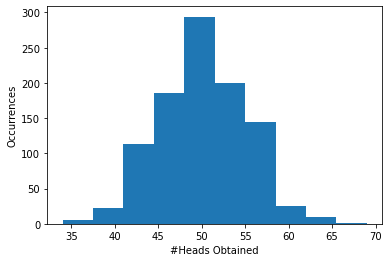

In [9]:
# If we draw a lot of samples, we should see the proportion of heads centered around the expected 50-50

# We can repeat this a number of times with a different number of tosses (N)
K=1000  # how many times we run the N-toss simulation
N=[100] # number of tosses (N) = sample size

meanarr=np.zeros(K, float) #allocate an array of size K

for j in range(0,K): #repeat for length of K
       score=np.random.randint(2, size=N)   #generate vector of size N with random scores
       meanarr[j]=sum(score)                # calculate the frequency of heads for K=j   

count, bins, ignored =plt.hist(meanarr) #plot histogram with K frequencies 

plt.ylabel('Occurrences')
plt.xlabel('#Heads Obtained')

#Try to re-run this code several times, and see the histogram change

<a id= 'CompletionRate'> </a>

### 2.3 Completion rate

It is difficult to compare our values of successful task completion if we have different number of users trying it out. It therefore makes sense to record values in proportion to the number of attempts (or participants). 

*Completion rate* is the number of successfully completing users divided by the total number of users, moving from discrete values to proportion or percentages. We can do the same with our head tosses and look at proportions instead.


Text(0.5, 0, '#Heads Obtained')

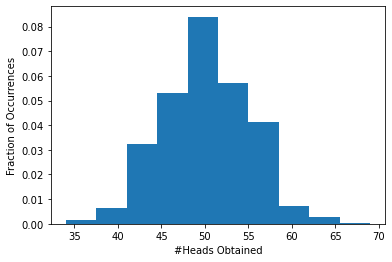

In [10]:
#Rather than plotting total frequency we use the histogram option density=True 
# This means that it will normalize all values so the total area under the curve is equal to 1. 
count, bins, ignored =plt.hist(meanarr,density= True) #plot histogram with K means but with area=1

plt.ylabel('Fraction of Occurrences')
plt.xlabel('#Heads Obtained')

<a id= 'Continous'> </a>

### 2.4 Continuous Data
Rather than recording completion scores (0 or 1) and rates, we can measure the task time. That is how *long* does it take for users to complete the task. 

When we measure things like time, the data can take any value. Examples are time measured, height, weight...
Depending on the precision of measurement we can record, two measurements will vary.


### Try out 2

Record your reaction time using this page https://humanbenchmark.com/tests/reactiontime.
Redo the test 7 times and record your reaction times (in ms) in a variable. Plot the values.

In [11]:
# Record the reaction times in a variable and plot the histogram
# reactime=np.array([])


ANSWER: If you would continue to collect a larger sample of reaction time data, would you expect the histogram to have similar shapes as the occurrences of heads in the flipping coin examples? If not, why not?

<a id= 'Contingency'> </a>

### 3 Contingency Table
Returning once more to categorical data, you might have a selection task where people are asked to make a choice between two or more alternatives. For instance, you may be interested in testing which of two designs the participants prefer. In psychology, the "N-alternative-forced-choice" paradigm is often used, where "N" is typically 2, 3, or some other number of choices that the participants have to select from. 

For instance, we could have users select between two images, and we record whether they chose the original file or a manipulated one.

Thus the categorical data, we typically get it in a form similar to:

| Image pair |Original|
|-----|--------|
|1  |Yes       |
|2  |No     |
|3  |No     |
|4  |No     |
|5  |No     |
|6  |Yes    |
|7  |Yes   |
|8  |No     |
|:  |:     |


and so on. 

For analysis, we instead want a *contingency table* where we summarize the observed frequencies. In the above example, we can imagine that for a total of 144 image pairs, in 80 cases our participant chose the original image. 

|Original |Manipulated|Total|
|-----|--------|-----|
|80   |64      |144  |


In other cases, we have more variables resulting in several rows, giving us a R x C table. For instance, we might have two different groups of users (novices and experts) that evaluate and select their preferences from among three different physical interfaces for a digital application. 

In [12]:
# The data for the different participants and their preferences could look something like this: 
df = pd.DataFrame({'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'Experience': ['novice', 'expert', 'expert', 'novice', 'novice', 'expert',
                               'expert', 'expert', 'expert', 'expert', 'novice', 'novice', 'novice',
                               'novice', 'novice', 'novice', 'novice', 'novice', 'expert', 'novice'],
                   'Interface': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})
# Print out the first four participants
df.head(4)

,Participant,Experience,Interface
0,1,novice,A
1,2,expert,A
2,3,expert,A
3,4,novice,A


This can now be summarized in a contingency table with Instrument in the rows, and choice of Interface in columns.

In [13]:
# Create contingency table with Instrument as rows, and choice of Interface in columns

Interfacetable = pd.crosstab(df.Experience, [df.Interface], margins = False)
# Margins = True adds the row and column sums

Interfacetable

Interface,A,B,C
Experience,,,
expert,2,5,1
novice,2,3,7


The table should be interpreted as
- Among the eight experts (first row): 2 chose interface A, 5 interface B, and 1 chose interface C 
- Among the 12 novices (second row): 2 chose interface A, 3 interface B, and 7 chose interface C

Alternatively, if we choose to focus on the columns:
- Interface A was selected by a total of 4 participants, while interface B and C were both preferred by 8. 

From the table, it seems like experts and novices had different preferences in their choice of control interface. 

<a id= 'Sensitivity'> </a>


### 4 Sensitivity of quantitative data
There a difference between asking:

*Q. Did you like this product? (Select one)*

YES / NO 

**and**

*Q. To what degree did you like this product? (put a cross on the scale)*

Not at all<------------------------------> Very much


The first response example generates data that can take one of two values. The other example can take many different values. You have probably encountered the latter as a type of rating scale in surveys, where there might be 3, 5 or more steps between "Not at all" and "Very much". But if done on paper or with an online slider, the number values the data can take between the two extremes can be many more. Even continuous. 

Depending on how we ask and collect quantitative data, it will end up in different places on the spectrum from binary (can take one of two values) to continous. This also means the measures have different *sensitivities*. The second way of asking will give you more detailed information on the degree to which the product is liked.

Not only does the measur we choose for our data collection determine the sensitivity, it will also determine what type of statistical analysis we can apply. Therefore it is always smart to think as far as data analsysis *before* you collect your data.


### Try out 3: 
Compare the above examples to the commonly-used experience rating found here in Microsoft Teams. 

What kind of data is this? How is the sensitivity compared to other scales that could have been used?


![](./UXfigures/CallQuality.png "Title")